In [ ]:
# default_exp gbe.baseline_drinking

# Baseline drinking (modelled separately)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Information sampling task

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
ist = ist_scoring.get_oversampling_sep(df)[0]
ist = ist.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
ist = ist.groupby('participant').mean()
ist.columns = ['ist_oversampling']

### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep(df)
wm = wm.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.groupby('participant').mean()
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

9 participants used an old version of the task in some of their sessions.  14 sessions (2.58%) were removed from the dataset.
6 sessions (1.14%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
rtt = rtt_scoring.get_perc_gamble_predicted_sep(df)
rtt = rtt.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.groupby('participant').mean()
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
sst = sst_scoring.get_ssrt_sep(df)[0]
sst = sst.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.groupby('participant').mean()
sst.columns = ['ssrt']

### Drinking

In [ ]:
initial_participants = dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']).query("is_initial").participant.unique()
len(initial_participants)

300

### Standard drinks per day over last three month

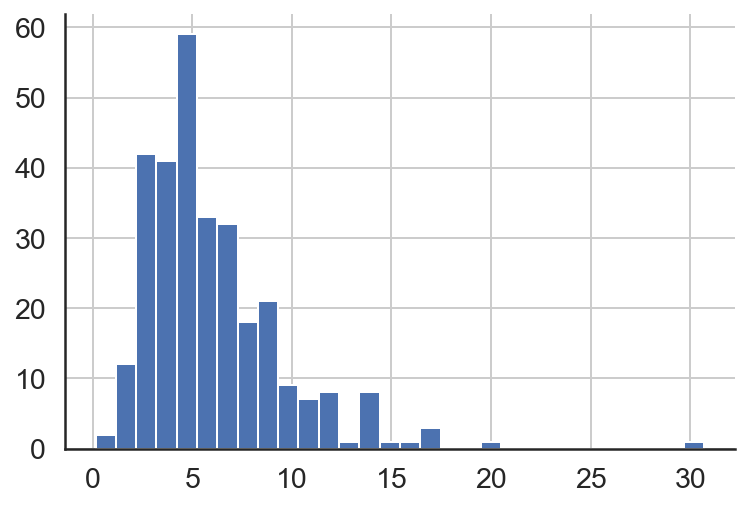

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_qf1_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
standard_last_three = ba[~ba.bx_qf1_sum.isnull()][['mov_id','bx_qf1_sum']]
standard_last_three.columns = ['participant','last_three_month']
standard_last_three = standard_last_three.groupby('participant').first()
standard_last_three.last_three_month.hist(bins = 30)
sns.despine()

### AUD criteria

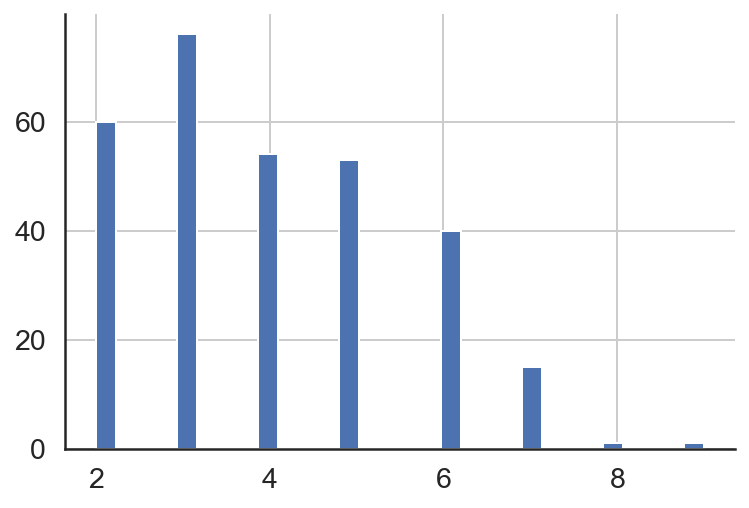

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Average ema drinking first month

In [ ]:
two_day = dp.get_two_day_data()
average_ema = two_day.query("sampling_day<30").groupby('participant').g_alc.agg(['mean','median'])
average_ema.columns = ['mean_g_alc','median_g_alc']
average_ema = average_ema.reset_index()
average_ema = average_ema[average_ema.participant.isin(initial_participants)].set_index('participant')

<AxesSubplot:>

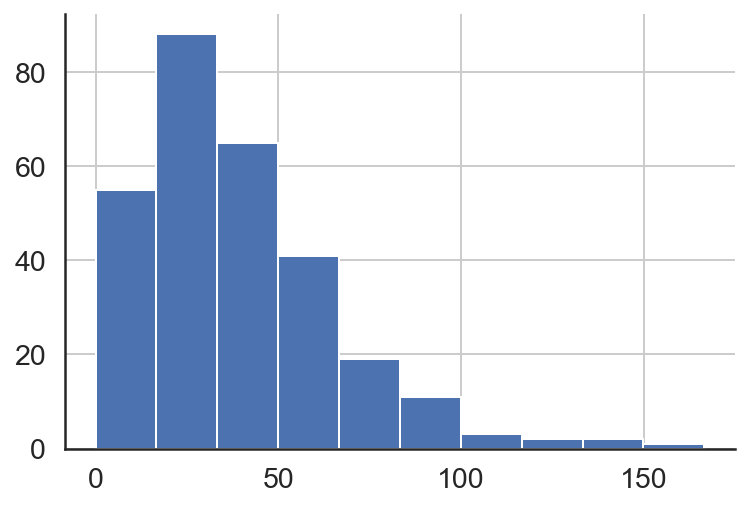

In [ ]:
average_ema.mean_g_alc.hist()

<AxesSubplot:>

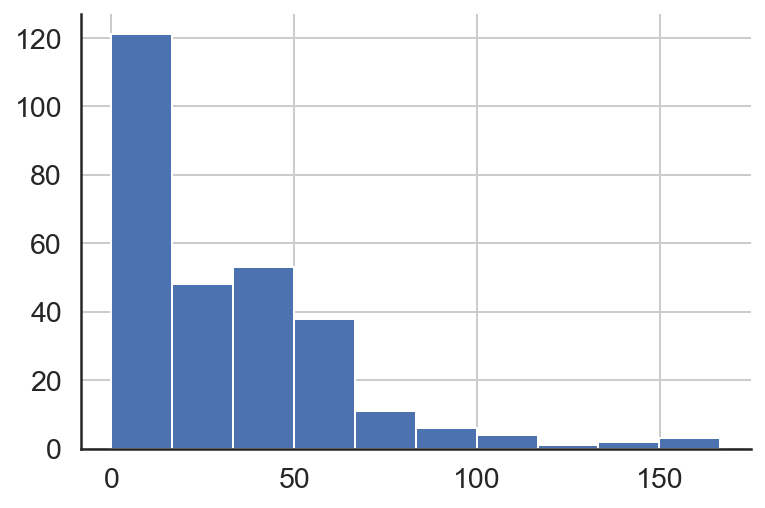

In [ ]:
average_ema.median_g_alc.hist()

### Merging

In [ ]:
average_ema.index.is_unique

True

In [ ]:
drinking = pd.concat([standard_last_three, aud, average_ema],axis = 1)

## Correlations

In [ ]:
import numpy as np
import trr265.stats as stats
import scipy.stats


def correl(df, corr_func = scipy.stats.pearsonr):
    df_corr = pd.DataFrame() # Correlation matrix
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.columns:
        for y in df.columns:
            corr = corr_func(df[x], df[y])
            df_corr.loc[x,y] = corr[0]
            df_p.loc[x,y] = corr[1]
    return df_corr, df_p

def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = scipy.stats.pearsonr):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    sig = (df_p < alpha).replace({True:"*",False:""})
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: '%.2f'%x)
    df_corr_label = df_corr_label + sig
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()

### Drinking

#### Pearson

287


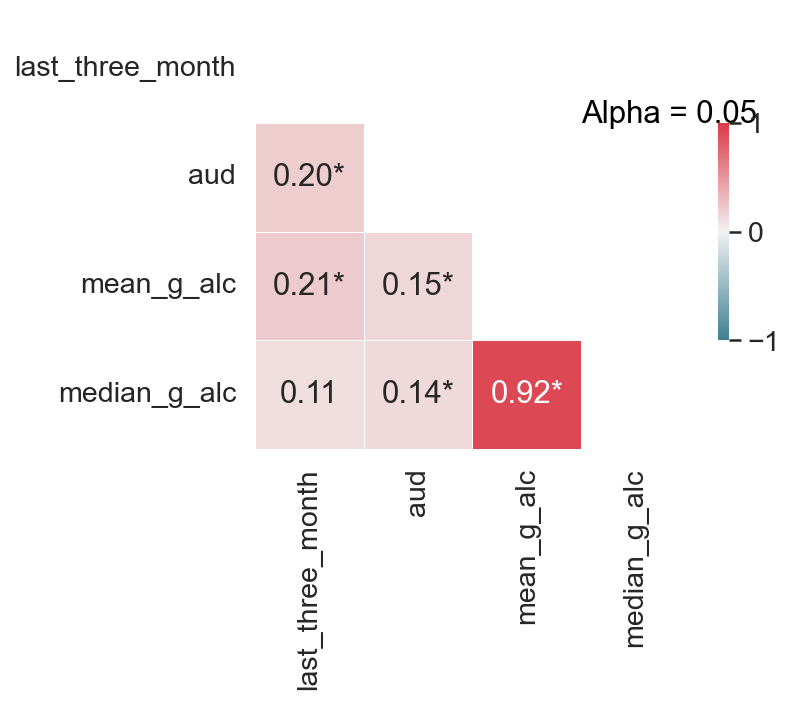

In [ ]:
correlation_matrix(drinking.dropna(), size = (5,4))

#### Spearman

287


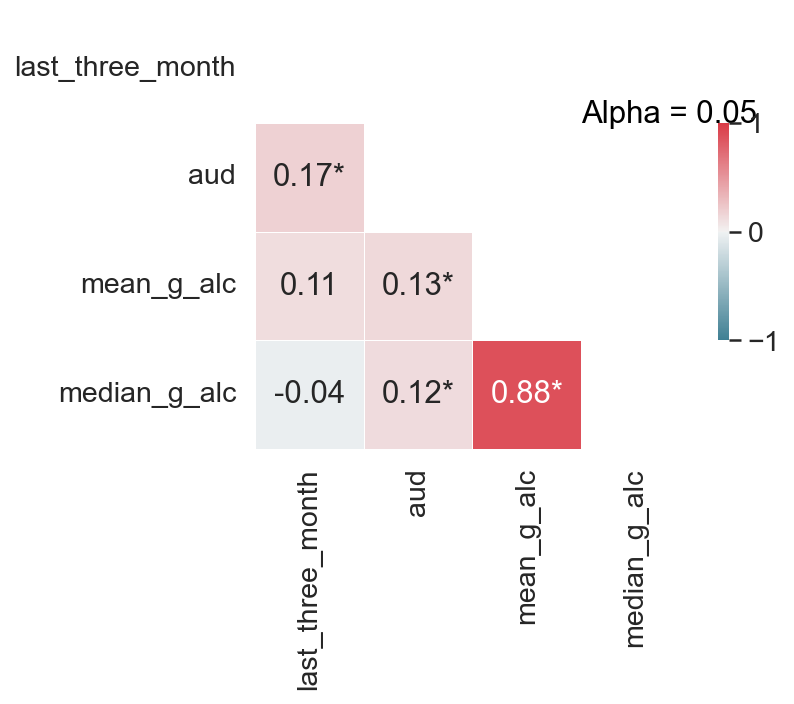

In [ ]:
correlation_matrix(drinking.dropna(), size = (5,4), corr_func = scipy.stats.spearmanr)

### Tasks

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1)

#### Pearson

278


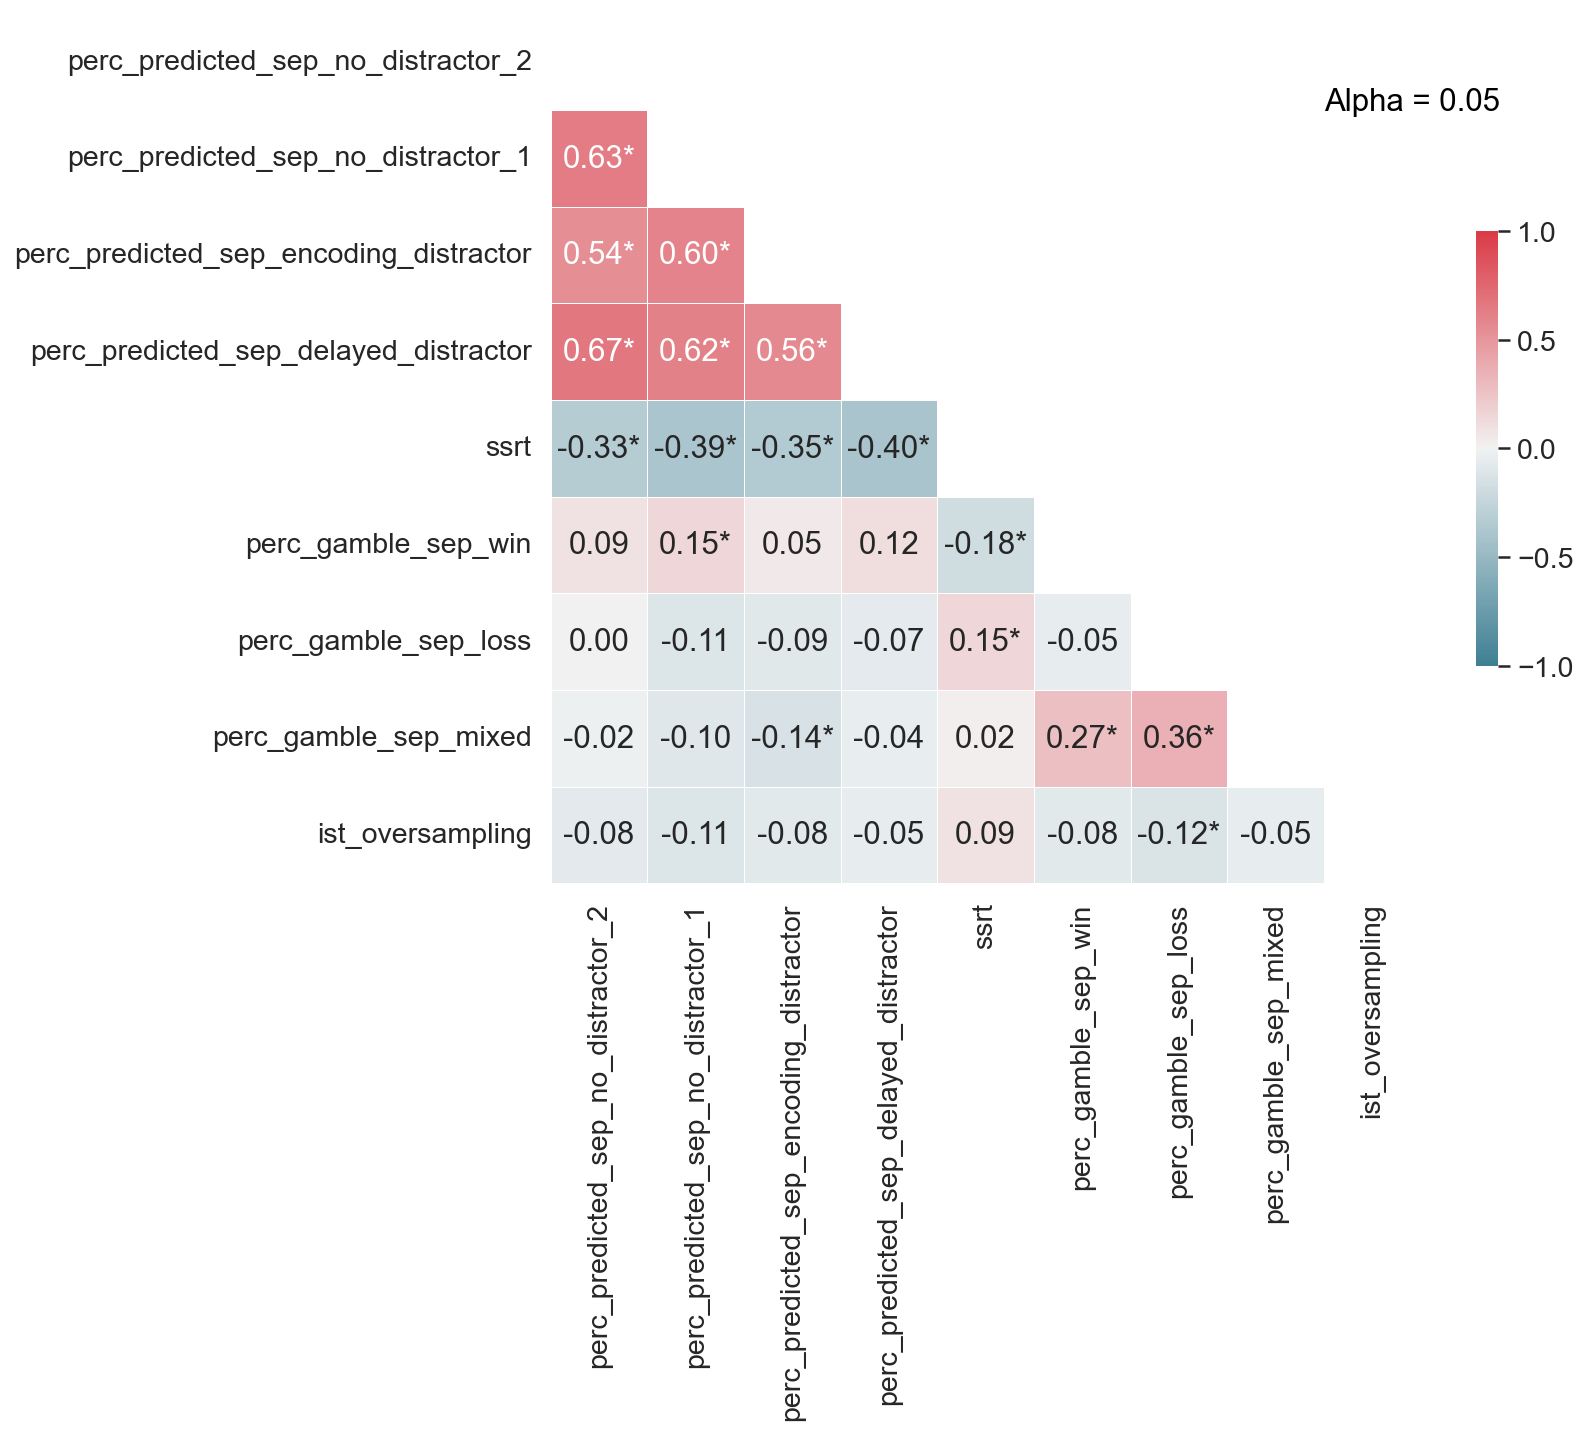

In [ ]:
correlation_matrix(tasks.dropna(), size = (10,8))

- Working memory scores correlate with each other.  
- RTT mixed correlates positvely with rtt win and rtt loss.
- SSRTs correlate negatively with working memory.  
- RTT win correlates positively with wm no distractor 1 and wm delayed and negatively with SSRTs.  
- RTT loss correlates positively with SSRTs.
- RTT mixed correlates negatively with wm encoding.
- Oversampling correlates negatively with rtt loss.

#### Spearman

278


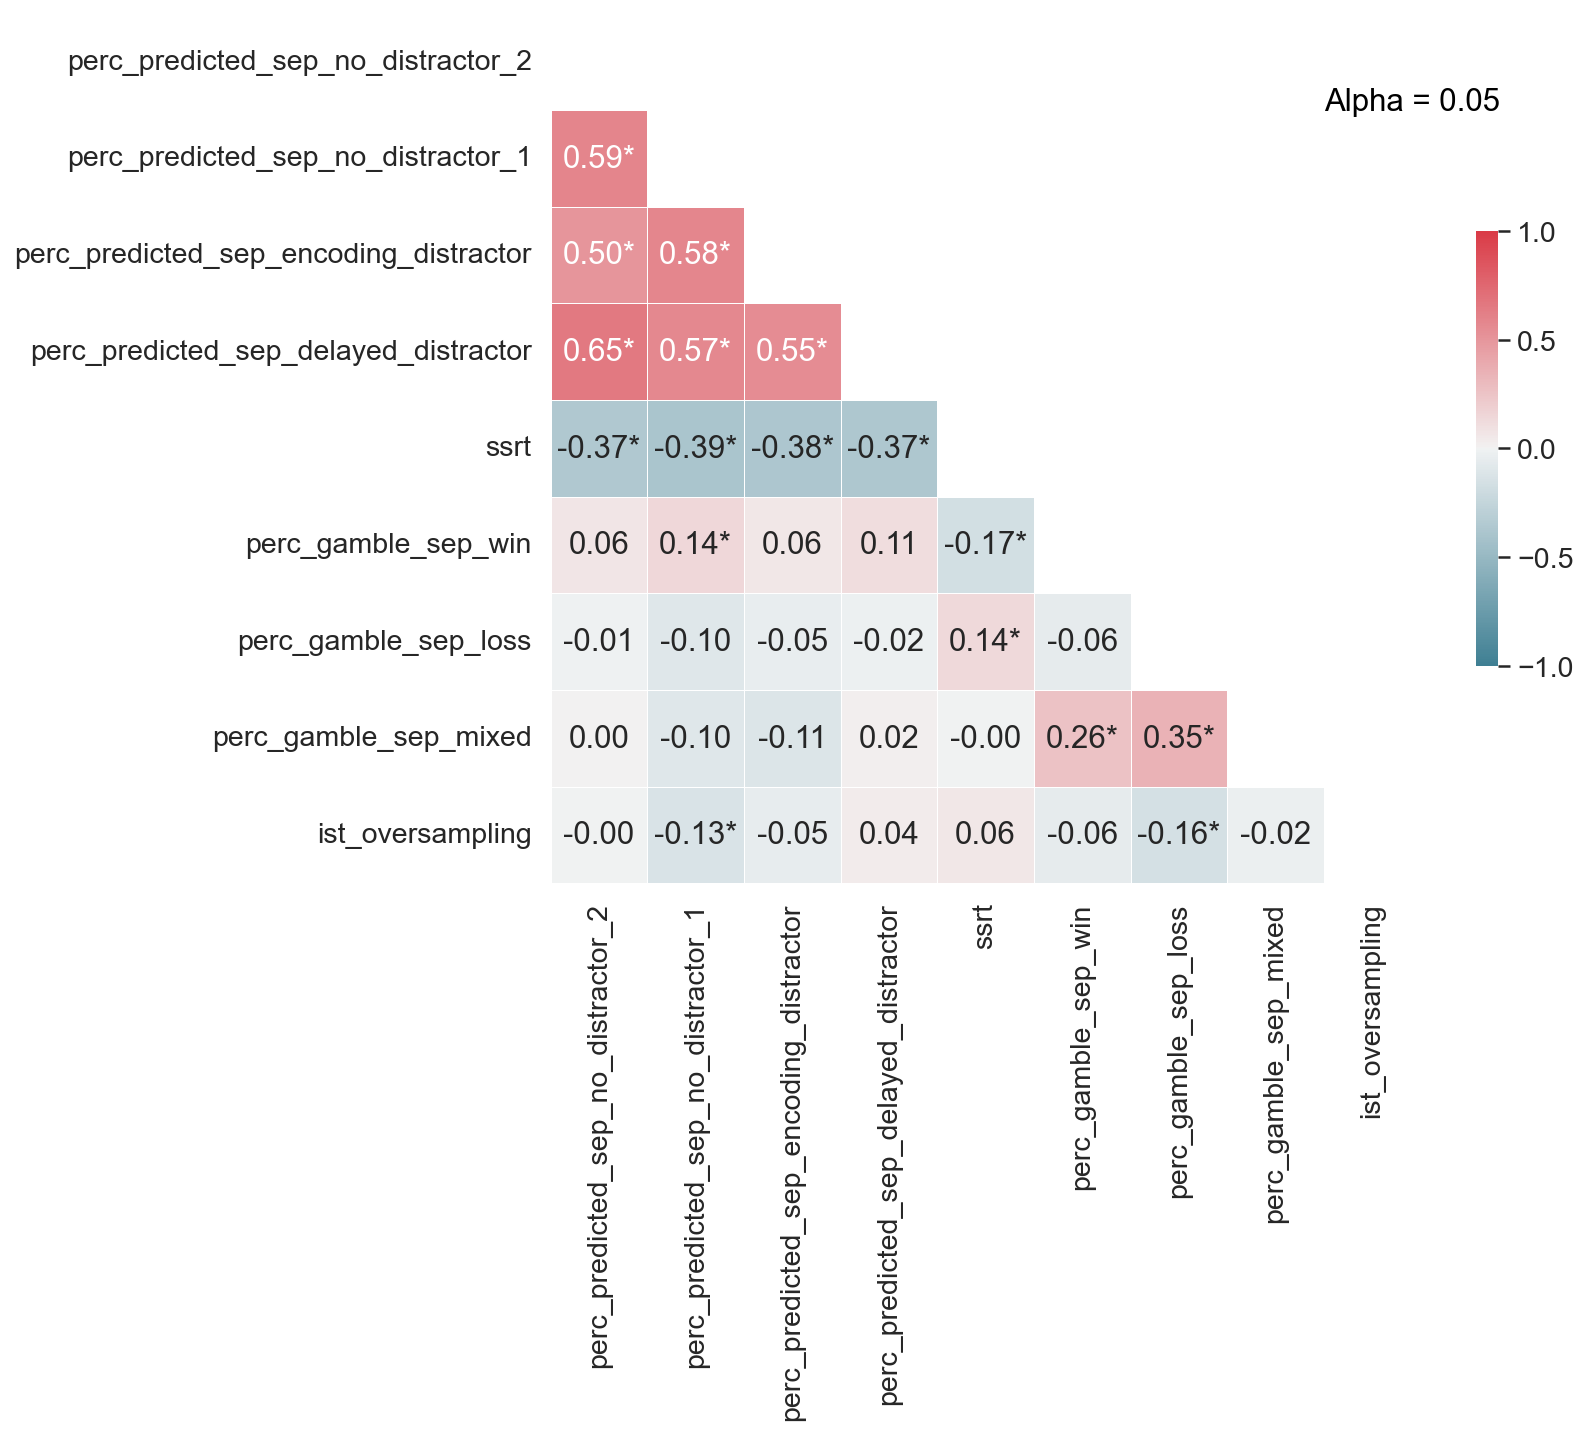

In [ ]:
correlation_matrix(tasks.dropna(), size = (10,8), corr_func = scipy.stats.spearmanr)

- Correlation between RTT win and wm delayed gone.
- Correlation RTT mixed correlates negatively with wm encoding gone.
- Oversampling now also negatively correlates with wm_no_1. 

### Together

#### Pearson

268


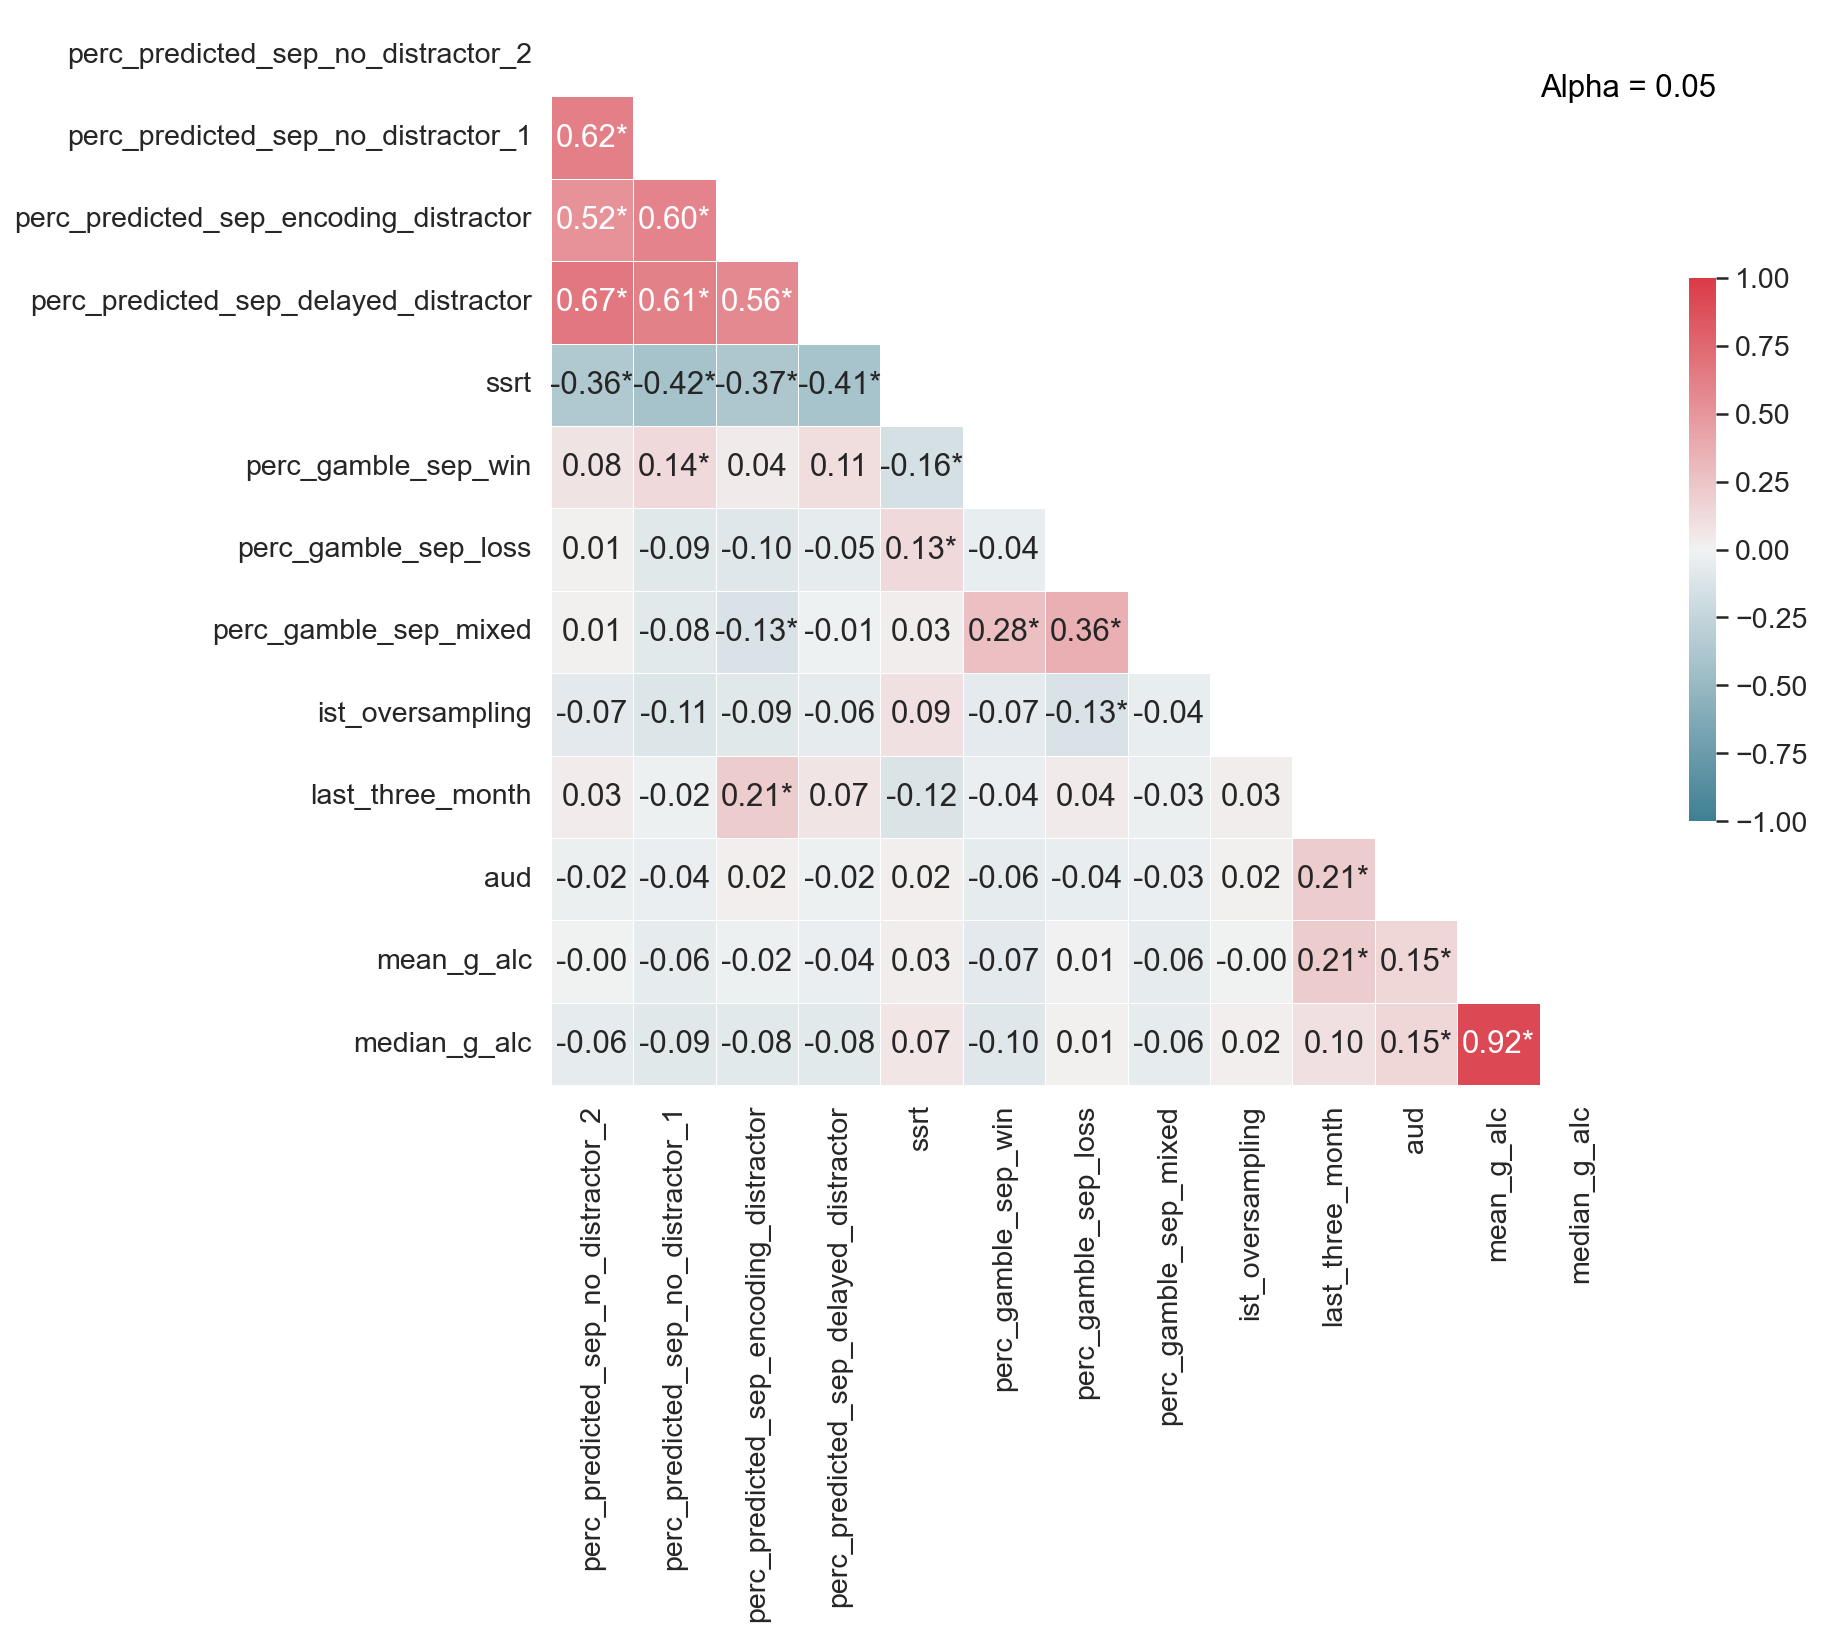

In [ ]:
correlation_matrix(pd.concat([tasks, drinking],axis = 1).dropna(), size = (12,10))

#### Spearman

268


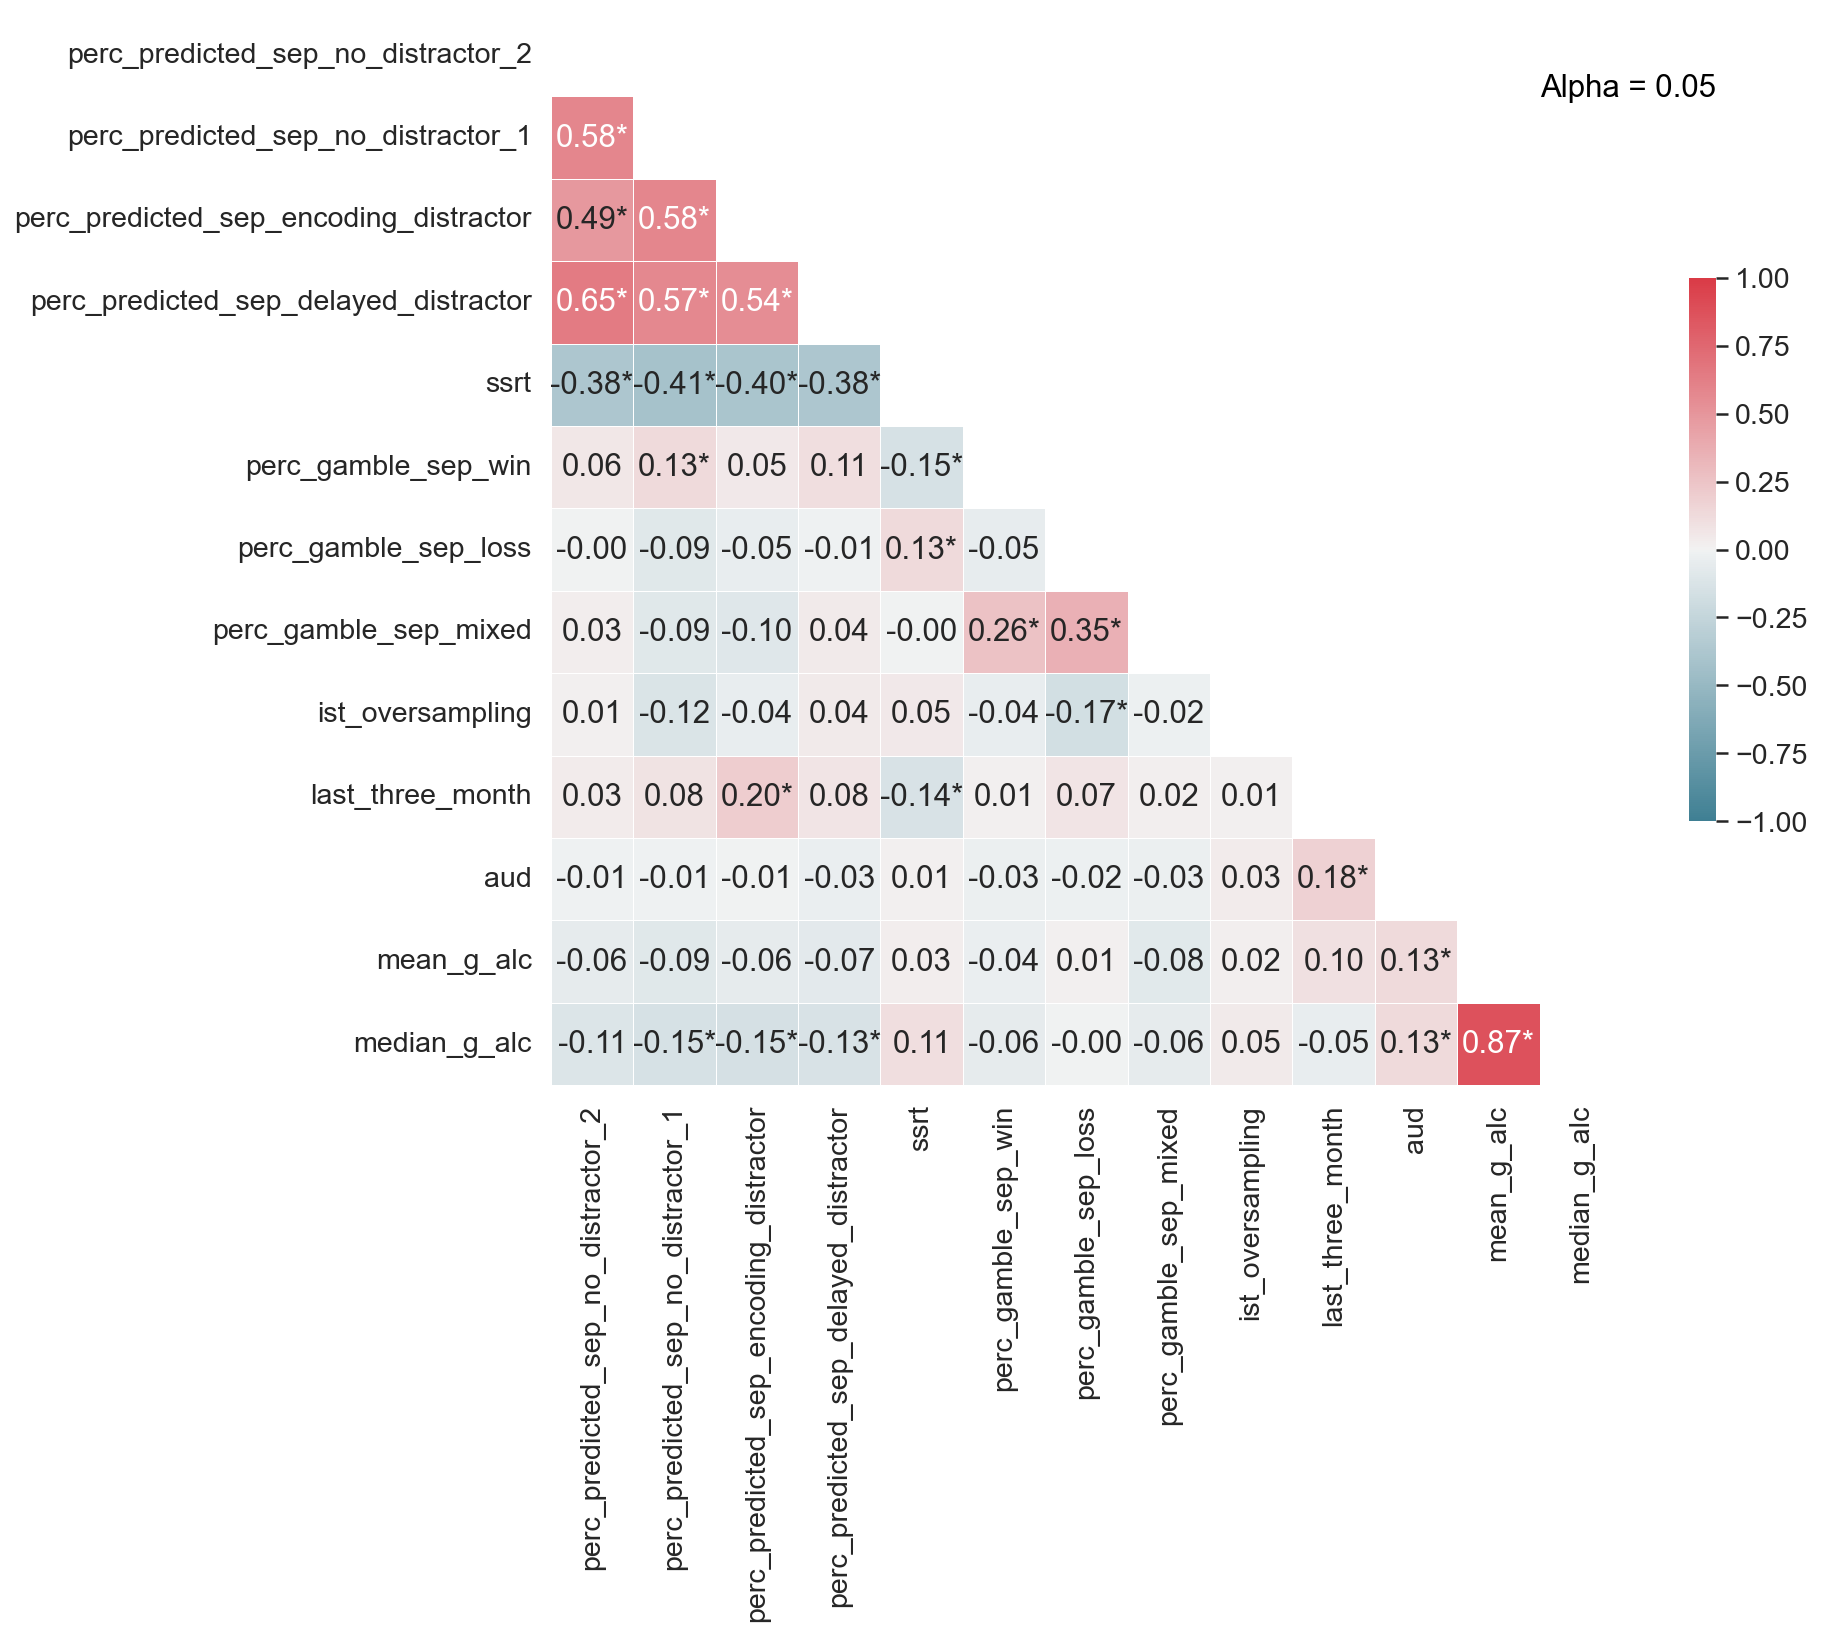

In [ ]:
all_data = pd.concat([tasks, drinking],axis = 1).dropna()
correlation_matrix(all_data, size = (12,10), corr_func = scipy.stats.spearmanr)

##### WM_encoding and last_three_month
Effect in the opposite direction as expected.

In [ ]:
np.std([.51,
.62 ,
.33,
.52,
.58,
.73,
.76,
.49,
.71,
.55,
.92,
-.24,
-.14,
.58,
.13,
.37,
.97,
.67,
.24,
.03,
.62,
.60,
.50,
.8,
.77,
.91])


0.30344788893939456

In [ ]:
sns.regplot(x = 'wm_encoding', y = 'last_three_month', data = all_data)

KeyError: 'wm_encoding'

##### SSRT and last_three_month
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'ssrt', y = 'last_three_month', data = all_data)

##### WM no distractor 1 and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_no_1', y = 'median_g_alc', data = all_data)

##### WM encoding and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_encoding', y = 'median_g_alc', data = all_data)

##### WM delayed and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_delayed', y = 'median_g_alc', data = all_data)